# Loading 4DSTEM datasets from ePSIC

With the installation of the DE16 camera and the new Freescan arbitrary scan generator, there are now a number of different ways of collecting 4DSTEM data at ePSIC. This notebook demonstrates how to load all of the different types of data that you might encounter into the Hyperspy/pyxem ecosystem.

## MerlinEM data acquired with the JEOL scan generator

Opening MerlinEM data acquired with the JEOL scan generator is straightforward as a data loader has been included in pyxem. The rows of the data are determined by picking out the flyback pixels from their longer exposure time. Data is automatically loaded lazily (that is, it is not loaded into RAM).

In [55]:
import pyxem as pxm
import hyperspy.api as hs
import numpy as np
%matplotlib notebook

In [3]:
merlin_jeol = pxm.load_mib('/dls/e02/data/2021/cm28158-1/Merlin/20210118_152746_data.mib')

reshaping using flyback pixel


In [4]:
print(merlin_jeol)

<LazyElectronDiffraction2D, title: , dimensions: (255, 255|515, 515)>


Typically, the data has also been converted to HDF5 format using ePSIC's conversion scripts (which uses pyxem's data loader). The converted HDF5 files can be loaded using Hyperspy, either lazily or not.

In [7]:
merlin_jeol_conv = hs.load('/dls/e02/data/2021/cm28158-1/processing/Merlin/20210118 145609/20210118_145609.hdf5',lazy=True)

In [8]:
print(merlin_jeol_conv)

<LazyElectronDiffraction2D, title: , dimensions: (255, 255|515, 515)>


## MerlinEM data acquired with the Freescan

Loading Freescan data is slightly more difficult due to the arbitrary nature of the scan. For regular rectangular scans, there remains straightforward approaches. The current version of pyxem (0.13.0) will read the mib file as TEM data because the Freescan doesn't include any flyback pixels.

In [9]:
merlin_freescan = pxm.load_mib('/dls/e02/data/2021/cm28158-1/Merlin/Freescan_cal/20210119_Freescan_600us_256X256_2.mib')

This mib file appears to be TEM data. The stack is returned with no reshaping.


In [10]:
print(merlin_freescan)

<LazyElectronDiffraction2D, title: , dimensions: (65536|515, 515)>


Once loaded, it's then possible to reshape the data to the correct shape.

In [18]:
merlin_freescan_reshaped = hs.signals.Signal2D(merlin_freescan.data.reshape((256,256,515,515)))

You can then convert the data back into the electron diffraction datatype for pyxem to use.

In [22]:
merlin_freescan_reshaped.set_signal_type('electron_diffraction')

I have also modified the pyxem loader to input the data shape and load in the mib files to the correct shape. This will hopefully go into a later version of pyxem but feel free to ask for the code currently.

In [25]:
merlin_freescan_mod = pxm.load_mib('/dls/e02/data/2021/cm28158-1/Merlin/Freescan_cal/20210119_Freescan_600us_256X256_2.mib', scan=(256,256))

reshaping using flyback pixel


In [26]:
print(merlin_freescan_mod)

<LazyElectronDiffraction2D, title: , dimensions: (255, 256|515, 515)>


### Loading non rectangular scans

Loading non-rectangular scans is more difficult, due to the arbitrary nature of the scan positions. The initial mib files can be loaded as usual, but will be assigned as TEM data.

In [2]:
merlin_arbitrary = pxm.load_mib('/dls/e02/data/2021/cm28158-1/Merlin/Freescan_cal/20210119_Freescan_600us_256_256_subsamples2X_2.mib')

This mib file appears to be TEM data. The stack is returned with no reshaping.


In [3]:
print(merlin_arbitrary)

<LazyElectronDiffraction2D, title: , dimensions: (32768|515, 515)>


It is then necessary to import the scan positions from the xyz file, this can be done using the following function.

In [4]:
def import_scan_pos(filename):
    positions = []
    import csv
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        
        #Skip lines
        for i in range(4):
            next(reader)

        for row in reader:
            positions.append((int(row[0]),int(row[1])))
    return(positions)

In [5]:
scan_positions = import_scan_pos('/dls/e02/data/2021/cm28158-1/DE16/Scan Coordinates XYZ Files/0256x0256/Subsampled_02x/0256x0256_Subsampled_02x_00001.xyz')

In [21]:
print(scan_positions{0:10})

[(2, 1), (1, 2), (2, 3), (1, 4), (2, 5), (1, 6), (2, 7), (1, 8), (2, 9), (1, 10), (2, 11), (1, 12), (2, 13), (1, 14), (2, 15), (1, 16), (2, 17), (1, 18), (2, 19), (1, 20), (2, 21), (1, 22), (2, 23), (1, 24), (2, 25), (1, 26), (2, 27), (1, 28), (2, 29), (1, 30), (2, 31), (1, 32), (2, 33), (1, 34), (2, 35), (1, 36), (2, 37), (1, 38), (2, 39), (1, 40), (2, 41), (1, 42), (2, 43), (1, 44), (2, 45), (1, 46), (2, 47), (1, 48), (2, 49), (1, 50), (2, 51), (1, 52), (2, 53), (1, 54), (2, 55), (1, 56), (2, 57), (1, 58), (2, 59), (1, 60), (2, 61), (1, 62), (2, 63), (1, 64), (2, 65), (1, 66), (2, 67), (1, 68), (2, 69), (1, 70), (2, 71), (1, 72), (2, 73), (1, 74), (2, 75), (1, 76), (2, 77), (1, 78), (2, 79), (1, 80), (2, 81), (1, 82), (2, 83), (1, 84), (2, 85), (1, 86), (2, 87), (1, 88), (2, 89), (1, 90), (2, 91), (1, 92), (2, 93), (1, 94), (2, 95), (1, 96), (2, 97), (1, 98), (2, 99), (1, 100), (2, 101), (1, 102), (2, 103), (1, 104), (2, 105), (1, 106), (2, 107), (1, 108), (2, 109), (1, 110), (2, 111

Once the scan positions are imported, it's then possible to reshape the data using the scan positions.

In [6]:
def reshape_arbitrary_scan(data, scan_positions):
    import numpy as np
    
    x_positions = []
    y_positions = []
    for pos in scan_positions:
        x_positions.append(pos[0])
        y_positions.append(pos[1])
    x_max = max(x_positions)
    y_max = max(y_positions)
    
    data_np = np.zeros((x_max,y_max,data.axes_manager[1].size,data.axes_manager[2].size))
    
    for i,pos in enumerate(scan_positions[:-1]):
        data_np[pos[0]-1,pos[1]-1,:,:] = data.inav[i].data
    
    data_out = hs.signals.Signal2D(data_np)
    
    return(data_out)

In [7]:
merlin_arbitrary.compute()

[########################################] | 100% Completed | 27.9s


In [8]:
merlin_arbitrary_reshaped = reshape_arbitrary_scan(merlin_arbitrary, scan_positions)

(256, 257, 515, 515)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
2

In [9]:
print(merlin_arbitrary_reshaped)

<Signal2D, title: , dimensions: (257, 256|515, 515)>


## DE16 acquired data

Data from the DE16 comes in a variety of file formats. The raw data from the Streampix software is in .seq format. These files do not include any dark or gain correction but can be loaded using pims (note: get pims for epsic3.7?).

In [1]:
import pims

In [2]:
images = pims.open('/dls/e02/data/2020/mg25140-9/DE_test_data/16-47-35.930.seq')

In [18]:
def pims_to_hs(images):
    np_data = np.zeros((len(images),images.frame_shape[0],images.frame_shape[1]))
    for i,image in enumerate(images):
        np_data[i,:,:] = image
    return(hs.signals.Signal2D(np_data))

In [21]:
de_raw = pims_to_hs(images)

In [22]:
print(de_raw)

<Signal2D, title: , dimensions: (10000|256, 256)>


Once the data is loaded, you can then reshape as shown for the Merlin data.

In [23]:
de_raw_reshaped = hs.signals.Signal2D(de_raw.data.reshape((100,100,256,256)))
de_raw_reshaped.set_signal_type('electron_diffraction')

In [25]:
print(de_raw_reshaped)

<ElectronDiffraction2D, title: , dimensions: (100, 100|256, 256)>


### Importing non-raw data

Direct Electron have their own software in which you can convert seq files to other formats. This software also performs dark/gain reference correction (with proprietary algorithms). There are a number of file formats to export to. The following code shows how to import the HDF5 files that have been reshaped to the correct dimensions. HDF5 files can only be exported for rectangular arrays.

In [28]:
import h5py

In [29]:
f = h5py.File('/dls/e02/data/2021/cm28158-1/DE16/256X256 test.h5', 'r')

In [56]:
de_hdf = np.array(f['4DSTEM_experiment']['data']['datacubes']['datacubes_0']['data'])

In [57]:
de_hdf_conv = hs.signals.Signal2D(de_hdf)

In [58]:
print(de_hdf_conv)

<Signal2D, title: , dimensions: (256, 256|256, 256)>


<IPython.core.display.Javascript object>


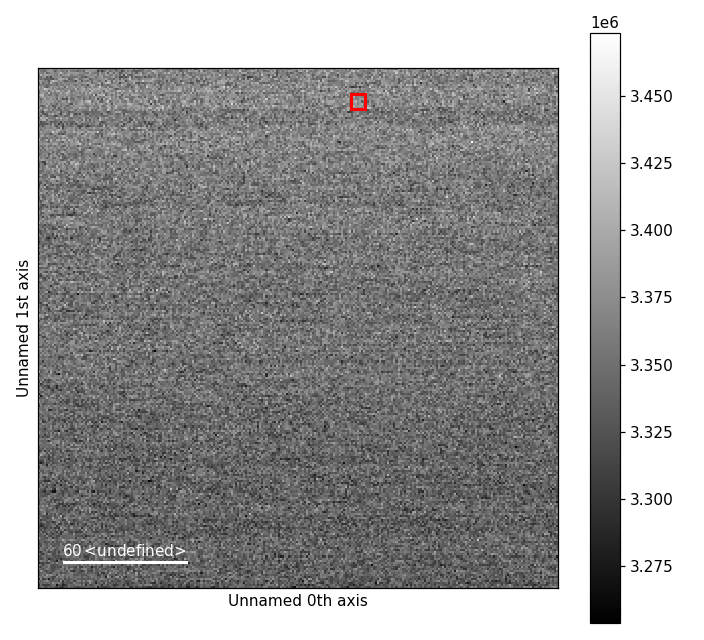

<IPython.core.display.Javascript object>


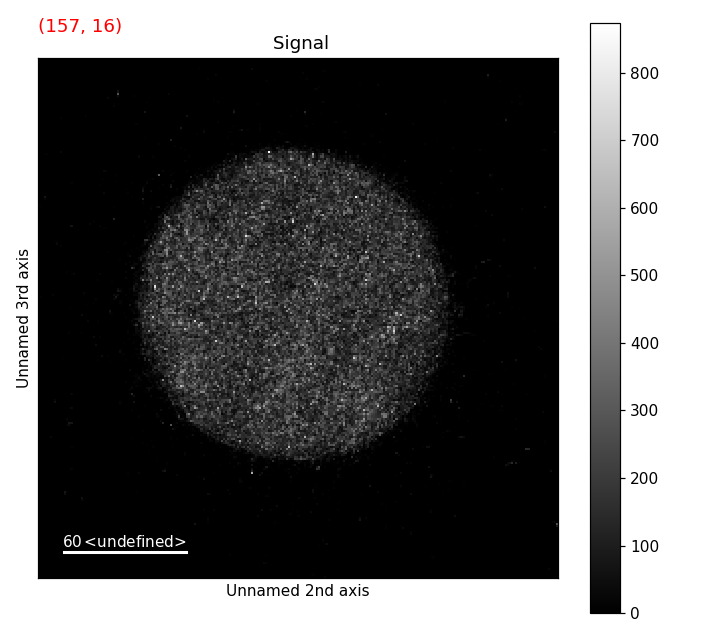

In [61]:
de_hdf_conv.plot()

In the case of non-rectangular scan arrays, data can be saved in to one of the other formats. The MRC format does not currently work with the hyperspy loader...

In [60]:
de_mrc = hs.load('/dls/e02/data/2021/cm28158-1/DE16/Test_256_subsampled_02x_01.mrc')

ERROR:hyperspy.io:If this file format is supported, please report this error to the HyperSpy developers.


IndexError: list index out of range